# IS 362 Final Project
## By: Taylor Clark Jones
#### For the final project, I will be analyzing US traffic accidents and the correlation of the time of the accident to the severity of injuries. Analyzing this data allows predicting future accidents and caution regarding driving within specific areas.
#### Key Questions:
#### Are accidents more prone during morning or evening?
#### Have accidents increased on decreased over the years?
#### Which cities are more prone to accidents?

##### To begin we will start with importing pandas and numpy before retrieving the dataset file.

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv(r'C:\Users\HP\\OneDrive\Desktop\US_Accidents_Dec21_updated.csv')

In [26]:
#let's view the first five rows of the dataset to determine how much cleaning will be required.
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
# Find shape of File
df.shape

(2845342, 47)

In [28]:
# View the column names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### Let's Begin cleaning the data.

In [29]:
# The following imports will allow math functions and data visualizations to be possible as we continue forward witht his project.
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [30]:
df.describe()
#statistics for columns with nu eric values

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [31]:
# See which columns have missing values
missing_data = df.isna().sum(axis=0).sort_values(ascending=True)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data


,missing_count
Street,2
City,137
Zipcode,1319
Civil_Twilight,2867
Sunrise_Sunset,2867
Astronomical_Twilight,2867
Nautical_Twilight,2867
Timezone,3659
Airport_Code,9549
Weather_Timestamp,50736


In [32]:
cities = df['City'].unique()
len(cities)

11682

In [33]:
accidents_by_cities = df['City'].value_counts()

#### Which Cities are most accident-prone?

In [34]:
accidents_by_cities[:10]
# Shows top 10 cities of driving accidents

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

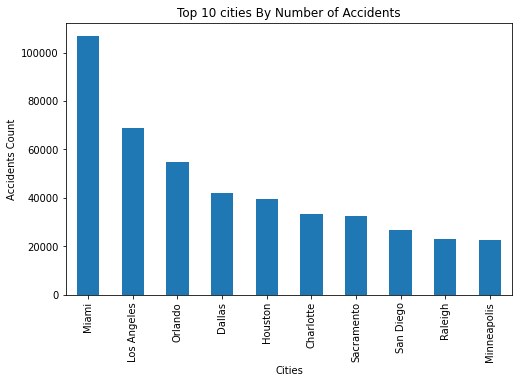

In [35]:
# use the matplotlib import
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

#### Are accidents more probable during AM or PM?

In [36]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [37]:
hour = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})

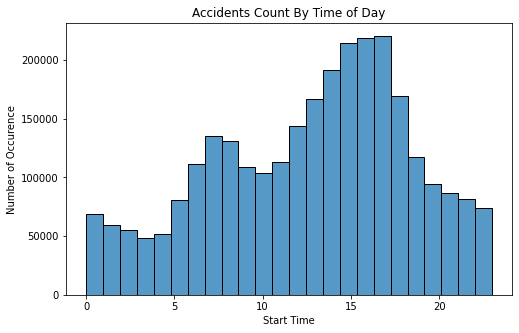

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

###### We can see from the image that most accidents occur between 15-17, which represents 4pm-6pm. This makes evening accidents more probable than morning accidents. We can even look further into this data by checking the percentages for each hour.

In [39]:
for (i,j) in zip(hour.Hour,range(0,24)):
  print("Percentage of accidents occurring at {} hour is {:.2f}%".format(i,(hour.Accident_Cases[j]/hour.Accident_Cases.sum())*100))

Percentage of accidents occuring at 17 hour is 7.74%
Percentage of accidents occuring at 16 hour is 7.68%
Percentage of accidents occuring at 15 hour is 7.53%
Percentage of accidents occuring at 14 hour is 6.73%
Percentage of accidents occuring at 18 hour is 5.94%
Percentage of accidents occuring at 13 hour is 5.85%
Percentage of accidents occuring at 12 hour is 5.05%
Percentage of accidents occuring at 7 hour is 4.75%
Percentage of accidents occuring at 8 hour is 4.60%
Percentage of accidents occuring at 19 hour is 4.11%
Percentage of accidents occuring at 11 hour is 3.98%
Percentage of accidents occuring at 6 hour is 3.91%
Percentage of accidents occuring at 9 hour is 3.82%
Percentage of accidents occuring at 10 hour is 3.65%
Percentage of accidents occuring at 20 hour is 3.33%
Percentage of accidents occuring at 21 hour is 3.06%
Percentage of accidents occuring at 22 hour is 2.85%
Percentage of accidents occuring at 5 hour is 2.82%
Percentage of accidents occuring at 23 hour is 2.61

#### The results show that hours 15, 16, and 17 all have the highest percentages of accident rates.
#### Next we will look into the increase and/or decrease in accidents over the years.

In [40]:
year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})

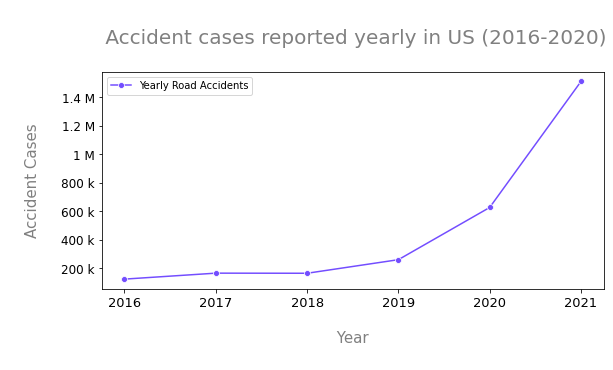

In [41]:
from matplotlib import ticker #https://www.geeksforgeeks.org/matplotlib-ticker-funcformatter-class-in-python/
#using a line graph as they are better for showing trends and progression over periods of time.
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported yearly in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Year \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.lineplot(data = year, marker='o', x='Year', y='Accident_Cases', color = '#734dff', label="Yearly Road Accidents")
a.xaxis.set_ticks(year.Year)
a.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

#### Same as before we'll translate this into percentages or easier understanding.

In [42]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Percentage of accidents occurring in year {} is {:.2f}%".format(i,(year.Accident_Cases[j]/year.Accident_Cases.sum())*100))

Percentage of accidents occurring in year 2021 is 53.13%
Percentage of accidents occurring in year 2020 is 22.00%
Percentage of accidents occurring in year 2019 is 9.09%
Percentage of accidents occurring in year 2017 is 5.76%
Percentage of accidents occurring in year 2018 is 5.73%


#### There has been a significant jump in accidents from 2020 to 2021 of 31.13%. To get a better understanding of the increase we will use the same for-in statement to calculate the average of monthly accidents in each year as well as the average of per day.

In [43]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Average no. of accidents occurring per month in year {} is {}.".format(i,round(year.Accident_Cases[j]/12)))

Average no. of accidents occuring per month in year 2021 is 125979.
Average no. of accidents occuring per month in year 2020 is 52155.
Average no. of accidents occuring per month in year 2019 is 21551.
Average no. of accidents occuring per month in year 2017 is 13660.
Average no. of accidents occuring per month in year 2018 is 13598.


In [44]:
for (i,j) in zip(year.Year,range(0,5)):
  print("Average no. of accidents occurring per day in year {} is {}.".format(i,round(year.Accident_Cases[j]/365)))

Average no. of accidents occurring per day in year 2021 is 4142.
Average no. of accidents occurring per day in year 2020 is 1715.
Average no. of accidents occurring per day in year 2019 is 709.
Average no. of accidents occurring per day in year 2017 is 449.
Average no. of accidents occurring per day in year 2018 is 447.


#### Bonus findings
#### Personally I am not a fan of driving in wet weather, lets pull the data from the weather column and compare it to accident severity.

In [45]:
weather_conditions = df.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                142
Blowing Dust / Windy        148
Blowing Sand                  1
Blowing Snow                162
Blowing Snow / Windy         86
                           ... 
Volcanic Ash                  4
Widespread Dust              50
Widespread Dust / Windy      18
Wintry Mix                 3843
Wintry Mix / Windy           74
Name: ID, Length: 127, dtype: int64

In [46]:
weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                         1107194
Mostly Cloudy                 363959
Cloudy                        348767
Partly Cloudy                 249939
Clear                         173823
                              ...   
Low Drifting Snow                  1
Light Fog                          1
Mist / Windy                       1
Sand / Dust Whirls Nearby          1
Sleet / Windy                      1
Name: ID, Length: 127, dtype: int64

In [47]:
weather_conditions.sort_values(ascending=False)[:20] #controlled set

Weather_Condition
Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: ID, dtype: int64

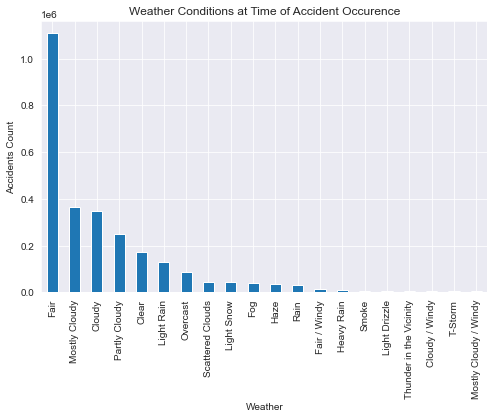

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()


### What the research has told us...
#### This single dataset has shown that accidents are more likely to occur between 4pm and 6pm, with a 31.13% increase in overall accidents from 2020 to 2021. Following the pattern of the data, one could assume that once 2022 has ended the yearly accidents will again show in increase from 2021 to 2022.
#### The weather for most driving accidents is also 'fair', which can be due to drivers being less likely to drive in wet weather. This can eliminate weather as a factor in accidents.

##### Below is a constructed table featuring the columns of data used within my research efforts.

In [52]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [54]:
df_subset = df[['ID','Start_Time','End_Time', 'Weather_Condition', 'Severity','City' ]]

In [55]:
df_subset.head()

,ID,Start_Time,End_Time,Weather_Condition,Severity,City
0,A-1,2016-02-08 00:37:08,2016-02-08 06:37:08,Light Rain,3,Dublin
1,A-2,2016-02-08 05:56:20,2016-02-08 11:56:20,Light Rain,2,Dayton
2,A-3,2016-02-08 06:15:39,2016-02-08 12:15:39,Overcast,2,Cincinnati
3,A-4,2016-02-08 06:51:45,2016-02-08 12:51:45,Overcast,2,Akron
4,A-5,2016-02-08 07:53:43,2016-02-08 13:53:43,Light Rain,3,Cincinnati
